# <div style="text-align: center"> **Corso di Probabilità e Statistica** </div> 
### <div style="text-align: center"> Esame 28-01-2021 </div> 
***
## <div style="text-align: right"> Edoardo Tronconi </div> <div style="text-align: right"> n. matricola: 975734 </div>
***

# Librerie necessarie

In [1]:
import numpy as np # operazioni su vettori
import pandas as pd # data analysis
import matplotlib.pyplot as plt # grafici
import seaborn as sns # grafici

# Impostazioni grafiche

In [2]:
pd.set_option('display.max_columns', None) # mostra tutte le colonne di un dataframe

In [200]:
params = {
    'figure.figsize' : [12,8],
    'font.size' : 13,
}

plt.rcParams.update(params)

# Importo i dati

Uso come `MultiIndex` le Regione, le Province e i Comuni

Rimuovo le colonne `incremento %` in quanto non sono significative quando si raggruppano i dati per regione o provincia tramite `df.groupby`. Inoltre sono facilmente ricalcolabili

Ottengo per ogni foglio del documento excel un dataframe e poi li unisco tutti in un unico DataFrame `DATA`

In [500]:
df_decessi_mesi = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Totale per mese', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_mesi.index.names = ['REG', 'PROV']
df_decessi_mesi.columns.names = [None,None]
df_decessi_mesi.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)

#creo un dataframe contenente solo i nomi delle regioni
df_nomi_RegProvCom = df_decessi_mesi[['totale decessi']].rename(columns={'totale decessi': None})

#Rinomino le colonne con i nomi dei mesi
df_decessi_mesi.rename(columns={
                                '01/01 - 31/01' : 'Gen',
                                '01/02 - 29/02' : 'Feb',
                                '01/03 -31/03' : 'Mar',
                                '01/04 -30/04' : 'Apr',
                                '01/05 -31/05' : 'Mag',
                                '01/06 -30/06' : 'Giu',
                                },
                        level=1, inplace=True)

#rinomino la colonna 2020 in modo che il nome sia una stringa anzichè un int, per coerenza con gli altri label
df_decessi_mesi.rename(columns={
                                2020 : '2020'
                                },
                        level=0, inplace=True)

#rimuovo colonne non utili
df_decessi_mesi.drop(columns=['incremento %', 'totale decessi'], level=0, inplace=True)

df_decessi_sesso = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Totale per sesso', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_sesso.index.names = ['REG', 'PROV']
df_decessi_sesso.columns.names = [None,None]

df_decessi_sesso.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_sesso.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_sesso.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65 = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Totale', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65.index.names = ['REG', 'PROV']
df_decessi_over65.columns.names = [None,None]

df_decessi_over65.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65M = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Maschi', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65M.index.names = ['REG', 'PROV']
df_decessi_over65M.columns.names = [None,None]

df_decessi_over65M.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65M.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65M.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

df_decessi_over65F = pd.read_excel('./Tavola riepilogativa_30GIUGNO_7.357COMUNI.xlsx', sheet_name = 'Età65+ Femmine', header = [0,1], index_col=[0,1]).replace('-', np.nan)
df_decessi_over65F.index.names = ['REG', 'PROV']
df_decessi_over65F.columns.names = [None,None]

df_decessi_over65F.drop(columns=[('COD_PROVCOM')], level=1, inplace=True)
df_decessi_over65F.drop(columns=['incremento %','totale decessi'], level=0, inplace=True)

df_decessi_over65F.rename(columns={
                                '1 MARZO - 30 GIUGNO MEDIA 2015-2019' : 'MEDIA 2015-2019 marzo-giugno',
                                '1 MARZO - 30 GIUGNO 2020' : '2020',
                                },
                        level=0, inplace=True)

DATA = pd.concat([df_nomi_RegProvCom, df_decessi_mesi, df_decessi_sesso, df_decessi_over65, df_decessi_over65M, df_decessi_over65F],keys=['NOMI', 'MESI','SESSO','OVER 65','OVER 65 M','OVER 65 F'], axis=1)
DATA = DATA.reset_index().set_index([('NOMI',None,'NOME_REGIONE'),('NOMI',None,'NOME_PROVINCIA'),('NOMI',None,'NOME_COMUNE')]).drop(columns=['REG','PROV'], level=0)

DATA.index.names = ['REGIONE', 'PROVINCIA','COMUNE']
DATA.columns.names = ['FOGLIO EXCEL', 'ANNI',None]

In [513]:
DATA

FOGLIO EXCEL                                     MESI                      \
ANNI                                  MEDIA 2015-2019                       
                                                  Gen  Feb  Mar  Apr  Mag   
REGIONE  PROVINCIA    COMUNE                                                
Piemonte Torino       Agliè                       4.8  5.2  3.0  1.8  3.2   
                      Airasca                     3.4  2.8  1.8  1.8  2.2   
                      Ala di Stura                0.6  0.0  0.4  0.4  0.4   
                      Albiano d'Ivrea             2.6  1.0  2.4  2.8  2.4   
                      Almese                      8.4  6.0  2.8  3.6  6.2   
...                                               ...  ...  ...  ...  ...   
Sardegna Sud Sardegna Villaputzu                  4.2  5.6  4.4  4.0  4.8   
                      Villasalto                  2.0  2.0  1.0  2.2  2.0   
                      Villasimius                 2.8  2.6  3.0  1.8  1.8   
                      Villasor                    5.4  7.0  6.0  5.2  5.0   
                      Villaspeciosa               1.0  1.8  2.6  1.6  0.6   

FOGLIO EXCEL                                                         \
ANNI                                       2020                       
                                       Giu  Gen Feb Mar Apr Mag Giu   
REGIONE  PROVINCIA    COMUNE                                          
Piemonte Torino       Agliè            3.8    4   6   9   1   4   6   
                      Airasca          2.8    3   0   2   8   3   3   
                      Ala di Stura     0.4    1   2   2   0   0   4   
                      Albiano d'Ivrea  1.6    1   3   3   1   1   1   
                      Almese           4.8    9   5   9   6   2   3   
...                                    ...  ...  ..  ..  ..  ..  ..   
Sardegna Sud Sardegna Villaputzu       4.6    4   4   6   9   2   4   
                      Villasalto       1.4    1   0   1   2   4   2   
                      Villasimius      2.4    3   4   4   4   2   4   
                      Villasor         5.4    4   8   8  10   3   5   
                      Villaspeciosa    1.4    1   2   3   3   0   1   

FOGLIO EXCEL                                                 SESSO        \
ANNI                                  MEDIA 2015-2019 marzo-giugno         
                                                                 M     F   
REGIONE  PROVINCIA    COMUNE                                               
Piemonte Torino       Agliè                                    5.2   6.6   
                      Airasca                                  4.8   3.8   
                      Ala di Stura                             1.2   0.4   
                      Albiano d'Ivrea                          5.0   4.2   
                      Almese                                   8.0   9.4   
...                                                            ...   ...   
Sardegna Sud Sardegna Villaputzu                              11.0   6.8   
                      Villasalto                               2.8   3.8   
                      Villasimius                              5.8   3.2   
                      Villasor                                11.4  10.2   
                      Villaspeciosa                            3.8   2.4   

FOGLIO EXCEL                                              \
ANNI                                        2020           
                                        M+F    M   F M+F   
REGIONE  PROVINCIA    COMUNE                               
Piemonte Torino       Agliè            11.8   10  10  20   
                      Airasca           8.6    9   7  16   
                      Ala di Stura      1.6    3   3   6   
                      Albiano d'Ivrea   9.2    5   1   6   
                      Almese           17.4   13   7  20   
...                                     ...  ...  ..  ..   
Sardegna Sud Sardegna Villaputzu     

# Analisi

In [499]:
DATA.describe()

FOGLIO EXCEL            MESI                                         \
ANNI         MEDIA 2015-2019                                          
                     Gennaio     Febbraio        Marzo       Aprile   
count            7357.000000  7357.000000  7357.000000  7357.000000   
mean                8.786679     7.384885     7.484736     6.679842   
std                49.531075    40.649877    41.284932    37.302205   
min                 0.000000     0.000000     0.000000     0.000000   
25%                 1.400000     1.200000     1.200000     1.000000   
50%                 3.000000     2.600000     2.600000     2.400000   
75%                 7.000000     6.000000     6.000000     5.400000   
max              3045.600000  2475.600000  2525.800000  2294.200000   

FOGLIO EXCEL                                                                   \
ANNI                                           2020                             
                   Maggio       Giugno      Gennaio     Febbraio        Marzo   
count         7357.000000  7357.000000  7357.000000  7357.000000  7357.000000   
mean             6.549028     6.264755     7.971999     7.215305    11.263694   
std             36.560708    35.508023    43.805092    37.794101    53.257271   
min              0.000000     0.000000     0.000000     0.000000     0.000000   
25%              1.000000     1.000000     1.000000     1.000000     1.000000   
50%              2.200000     2.200000     3.000000     3.000000     4.000000   
75%              5.200000     5.000000     7.000000     6.000000     9.000000   
max           2261.400000  2212.000000  2704.000000  2239.000000  2547.000000   

FOGLIO EXCEL                                         \
ANNI                                                  
                   Aprile       Maggio       Giugno   
count         7357.000000  7357.000000  7357.000000   
mean             9.216393     6.568710     5.878347   
std             49.897404    36.115477    31.620537   
min              0.000000     0.000000     0.000000   
25%              1.000000     1.000000     1.000000   
50%              3.000000     2.000000     2.000000   
75%              8.000000     5.000000     5.000000   
max           2349.000000  2123.000000  1951.000000   

FOGLIO EXCEL                        SESSO                            \
ANNI         MEDIA 2015-2019 marzo-giugno                             
                                        M            F          M+F   
count                         7357.000000  7357.000000  7357.000000   
mean                            12.923665    14.054696    26.978361   
std                             69.927520    80.707398   150.587585   
min                              0.000000     0.000000     0.000000   
25%                              2.000000     2.200000     4.200000   
50%                              4.600000     4.800000     9.400000   
75%                             10.600000    11.200000    21.600000   
max                           4332.400000  4961.000000  9293.400000   

FOGLIO EXCEL                                         \
ANNI                 2020                             
                        M            F          M+F   
count         7357.000000  7357.000000  7357.000000   
mean            16.018486    16.908658    32.927144   
std             78.783506    89.635528   168.251817   
min              0.000000     0.000000     0.000000   
25%              2.000000     2.000000     5.000000   
50%              6.000000     6.000000    11.000000   
75%             14.000000    14.000000    27.000000   
max           4260.000000  4710.000000  8970.000000   

FOGLIO EXCEL                      OVER 65                            \
ANNI         MEDIA 2015-2019 marzo-giugno                             
                                    65-74        75-84       85 e +   
count                         7357.000000  7357.000000  7357.000000   
mean                             3.640614     8.

In [257]:
df_decessi_mesi.drop(columns=['incremento %'], level=0).groupby(('totale decessi','NOME_REGIONE')).sum().join(df_decessi_mesi.groupby(('totale decessi','NOME_REGIONE')).mean()[['incremento %']]).drop(columns=[('totale decessi','COD_PROVCOM')])

MEDIA 2015-2019                           \
                                       Gennaio Febbraio   Marzo  Aprile   
(totale decessi, NOME_REGIONE)                                            
Abruzzo                                 1516.2   1268.2  1278.0  1138.2   
Basilicata                               563.0    496.8   510.0   452.8   
Calabria                                2059.2   1715.2  1761.6  1572.4   
Campania                                5705.8   4626.2  4679.6  4209.0   
Emilia-Romagna                          5104.4   4309.4  4445.0  3903.0   
Friuli-Venezia Giulia                   1467.0   1289.2  1275.8  1128.6   
Lazio                                   5854.0   4776.4  4892.6  4452.0   
Liguria                                 2236.0   1889.2  1909.2  1715.2   
Lombardia                              10447.6   8716.6  8659.8  7821.0   
Marche                                  1691.6   1448.2  1500.6  1311.8   
Molise                                   402.4    310.8   333.6   297.4   
Piemonte                                5398.2   4540.6  4509.2  4022.4   
Puglia                                  4069.2   3344.6  3436.4  3080.0   
Sardegna                                1590.8   1390.8  1407.8  1275.6   
Sicilia                                 5232.4   4549.0  4644.8  4000.8   
Toscana                                 4436.2   3744.8  3844.6  3412.2   
Trentino-Alto Adige/Südtirol             925.8    788.6   806.6   724.8   
Umbria                                  1057.0    866.6   917.8   818.4   
Valle d'Aosta/Vallée d'Aoste             141.6    120.0   122.4   109.6   
Veneto                                  4745.2   4139.4  4129.8  3698.4   

                                                  2020                         \
                                Maggio  Giugno Gennaio Febbraio  Marzo Aprile   
(totale decessi, NOME_REGIONE)                                                  
Abruzzo                         1113.0  1080.4    1390     1285   1483   1303   
Basilicata                       444.8   414.8     494      532    491    495   
Calabria                        1449.8  1422.0    1899     1638   1863   1653   
Campania                        4065.2  3813.6    5311     4581   4790   4192   
Emilia-Romagna                  3913.0  3728.4    4583     4260   7631   5960   
Friuli-Venezia Giulia           1102.6  1063.0    1435     1226   1478   1344   
Lazio                           4347.0  4191.0    5284     4543   5015   4311   
Liguria                         1697.4  1666.2    1853     1712   2973   2759   
Lombardia                       7742.4  7434.0    9275     8781  25227  16690   
Marche                          1332.8  1249.8    1545     1415   2240   1760   
Molise                           279.8   266.8     333      286    352    295   
Piemonte                        4030.8  3930.2    4593     4405   6960   6965   
Puglia                          2964.6  2873.2    3803     3337   3855   3526   
Sardegna                        1242.2  1168.2    1571     1404   1617   1392   
Sicilia                         3787.8  3608.4    4872     4230   4765   4057   
Toscana                         3390.6  3199.2    3973     3577   4387   4028   
Trentino-Alto Adige/Südtirol     701.2   670.8     848      854   1370   1245   
Umbria                           797.4   750.6     938      836   1004    814   
Valle d'Aosta/Vallée d'Aoste     109.6   103.0     117      121    197    192   
Veneto                          3669.2  3456.2    4533     4060   5169   4824   

                                                    MEDIA 2015-2019  \
                               Maggio Giugno totale          totale   
(totale decessi, NOME_REGIONE)                                        
Abruzzo                          1060    936   7457          7394.0   
Basilicata                        449    370   2831          2882.2   
Calabria                         1471   1353   9877          9980.2   
Campania       

<Figure size 864x576 with 0 Axes>

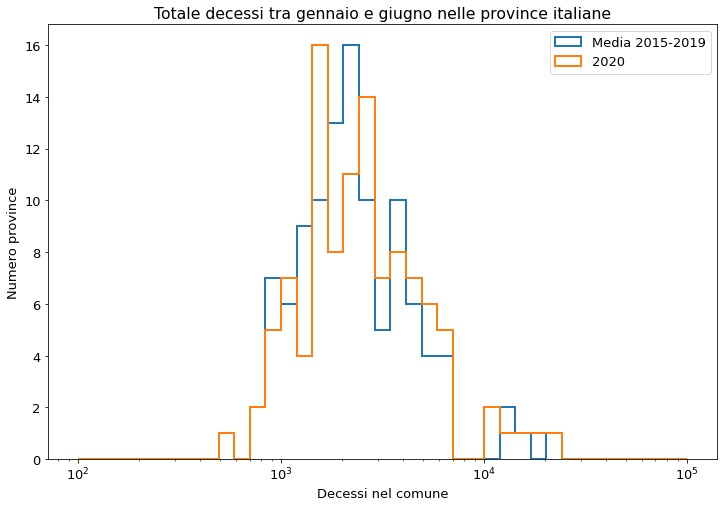

In [250]:
plt.figure()
df_decessi_mesi.groupby(('totale decessi','NOME_PROVINCIA')).sum()[[('MEDIA 2015-2019','totale'),(2020,'totale')]].plot.hist(bins=np.logspace(2,5,40),logx=True, histtype='step', lw=2)
plt.title('Totale decessi tra gennaio e giugno nelle province italiane')
plt.xlabel('Decessi nel comune')
plt.ylabel('Numero province')
plt.legend(['Media 2015-2019','2020'])